In [ ]:
!pip install tensorflow==2.1.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-6, 6, num=1000)
x1_data = np.linspace(-6, 6, num=1000)
y_data = 0.5*np.cos(x_data) +0.5*np.sin(x1_data) +0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.12.0
Data created successfully


In [ ]:
z=np.reshape((x_data,x1_data),(1000,2))
np.reshape((z),(1000,2))
print(z)


[[-6.         -5.98798799]
 [-5.97597598 -5.96396396]
 [-5.95195195 -5.93993994]
 ...
 [ 5.93993994  5.95195195]
 [ 5.96396396  5.97597598]
 [ 5.98798799  6.        ]]


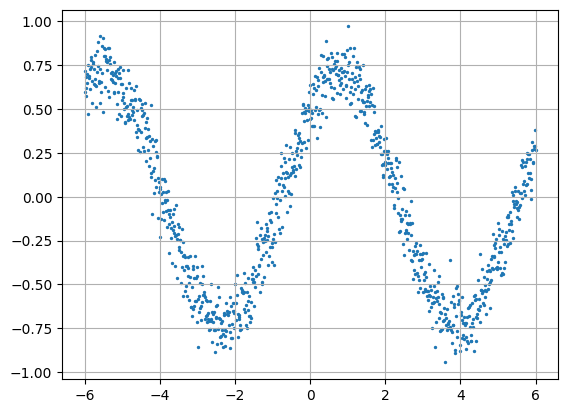

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.scatter(x1_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png')

Text(0.5, 0.92, 'f(x,y)')

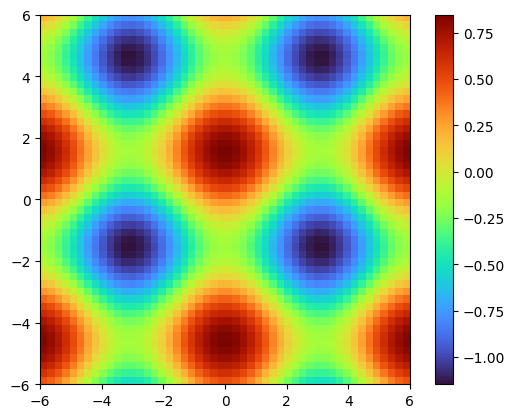

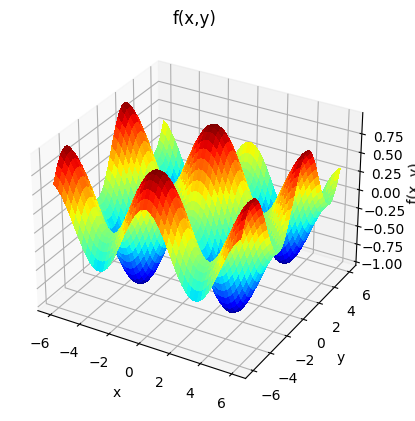

In [ ]:
x = np.linspace(-6, 6)
y = np.linspace(-6, 6)
xg, yg = np.meshgrid(x, y)

def fun(x,x1):
  y_data = 0.5*np.cos(x) +0.5*np.sin(x1) +0.1*np.random.normal(size=1)
  return y_data

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(fun(xg, yg), extent=[-6, 6, -6, 6], origin="lower",cmap="turbo")
plt.colorbar()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, fun(xg, yg), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('f(x,y)')

In [ ]:
print(xg)

[[-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]
 [-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]
 [-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]
 ...
 [-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]
 [-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]
 [-6.         -5.75510204 -5.51020408 ...  5.51020408  5.75510204
   6.        ]]


In [ ]:
# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[2,]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,356
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

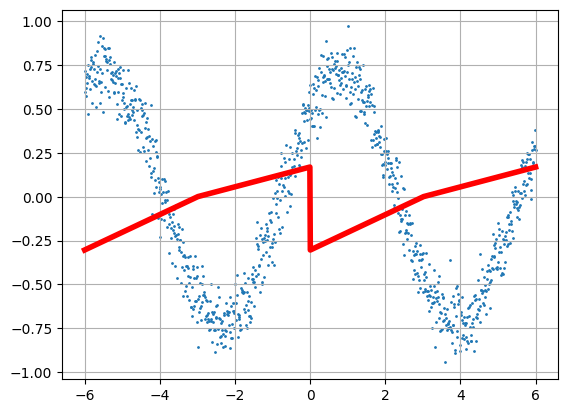

In [ ]:
# Compute the output
y_predicted = model.predict(z)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
files.download("training.png")

32/32 [==============================] - 0s 3ms/step


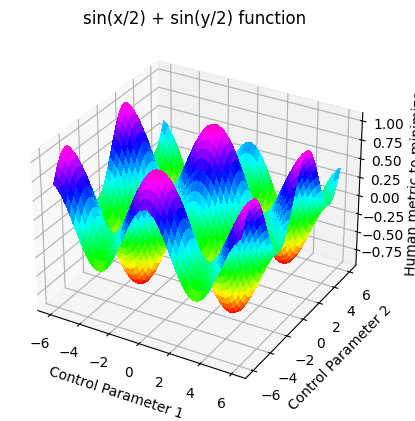

In [ ]:

x = np.linspace(-6, 6)
y = np.linspace(-6, 6)
xg, yg = np.meshgrid(x, y)

y_predicted = model.predict(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, fun(xg, yg), rstride=1, cstride=1,
                       cmap='gist_rainbow', linewidth=0, antialiased=False)

ax.set_xlabel('Control Parameter 1')
ax.set_ylabel('Control Parameter 2')
ax.set_zlabel('Human metric to minimize')
ax.set_title('sin(x/2) + sin(y/2) function')
plt.show()


In [ ]:
for x in range(1):
  # One epoch
  model.fit( z, y_data, epochs=1, verbose=1)

  # Compute the output
  y_predicted = model.predict(z)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)
  #plt.show()
  #plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  #files.download('training-' + str(x) +'-epochs.png')
  plt.clf()



32/32 [==============================] - 0s 3ms/step


<Figure size 640x480 with 0 Axes>